In [1]:
# Scientific computing imports
import itertools
import numpy
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm 
import networkx as nx
import scipy as sc
import pandas as pd
import seaborn; seaborn.set()
from mpl_toolkits.mplot3d import Axes3D

from shipnet_randv1_1 import MultiPlex,ShipNET
%matplotlib inline

In [2]:
# set directory

import os
import glob

# os.chdir("C:\Users\colinsh\Documents\compship\Data")
os.chdir("C:\Users\colinsh\Documents")
os.listdir("./")

# Using glob to list the output directory
glob.glob("simpleship_wred_50/ship-*")[0:5]

['simpleship_wred_50\\ship-bh1-h3-red1-20151015-0',
 'simpleship_wred_50\\ship-bh1-h3-red1-20151015-1',
 'simpleship_wred_50\\ship-bh1-h3-red1-20151015-10',
 'simpleship_wred_50\\ship-bh1-h3-red1-20151015-100',
 'simpleship_wred_50\\ship-bh1-h3-red1-20151015-101']

In [19]:
# all_data = pd.read_csv(os.path.join("simpleship_wred_50", "series_all.csv"),index_col=None)
all_data = pd.read_csv(os.path.join("simpleship_wred_50", "series_type.csv"),index_col=None)
#all_data = pd.read_csv(os.path.join("simpleship_all50", "series_all.csv"),index_col=None)
#all_data = pd.read_csv(os.path.join("warship_perm_noexc_fullh_trans", "series_all.csv"),index_col=None)
#type_data = pd.read_csv(os.path.join("simple_perm_noexc", "series_type.csv"),index_col=None)

In [6]:
#all_data=all_data.drop(all_data.columns[[0]],axis=1)
print all_data

       num_bh  height_dc  redundancy  permeability  interactions_type  \
0           1          3           1           0.0             1281.0   
1           1          3           1           0.0             1294.0   
2           1          3           1           0.0             1360.0   
3           1          3           1           0.0             1315.0   
4           1          3           1           0.0             1309.0   
5           1          3           1           0.0             1323.0   
6           1          3           1           0.0             1362.0   
7           1          3           1           0.0             1333.0   
8           1          3           1           0.0             1302.0   
9           1          3           1           0.0             1392.0   
10          1          3           1           0.0             1327.0   
11          1          3           1           0.0             1401.0   
12          1          3           1           0.0 

In [20]:
ship=ShipNET([8,3,6])
for x in range(2):
    for z in range (4,6):
        for y in range(3):
            ship.remove_ship_node((x,y,z))
for x in range(6,8):
    for z in range (4,6):
        for y in range(3):
            ship.remove_ship_node((x,y,z))
ship.remove_ship_node((0,0,0))
ship.remove_ship_node((0,1,0))
ship.remove_ship_node((0,2,0))

In [17]:
print all_data #[['num_bh','height_dc']]

       num_bh  height_dc  redundancy  permeability  interactions_type  \
0           1          3           1           0.0             1281.0   
1           1          3           1           0.0             1294.0   
2           1          3           1           0.0             1360.0   
3           1          3           1           0.0             1315.0   
4           1          3           1           0.0             1309.0   
5           1          3           1           0.0             1323.0   
6           1          3           1           0.0             1362.0   
7           1          3           1           0.0             1333.0   
8           1          3           1           0.0             1302.0   
9           1          3           1           0.0             1392.0   
10          1          3           1           0.0             1327.0   
11          1          3           1           0.0             1401.0   
12          1          3           1           0.0 

In [49]:
nodes=[]
for n in ship.ship.nodes():
    nodes.append(str(n))

edges=[]
for e in ship.ship.edges():
    edges.append(str(e))
    
mid_nodes=[]
for n in ship.ship.nodes():
    if n[1]==1:
        mid_nodes.append(str(n))

mid_edges=[]
for e in ship.ship.edges():
    if e[0][1]==1 and e[1][1]==1:
        mid_edges.append(str(e))
        
print mid_nodes 
print mid_edges

['(7, 1, 3)', '(7, 1, 1)', '(3, 1, 4)', '(4, 1, 5)', '(3, 1, 2)', '(3, 1, 0)', '(4, 1, 1)', '(4, 1, 3)', '(0, 1, 2)', '(5, 1, 5)', '(6, 1, 2)', '(5, 1, 1)', '(6, 1, 0)', '(5, 1, 3)', '(2, 1, 5)', '(2, 1, 3)', '(1, 1, 0)', '(2, 1, 1)', '(1, 1, 2)', '(7, 1, 2)', '(7, 1, 0)', '(3, 1, 5)', '(4, 1, 4)', '(3, 1, 3)', '(3, 1, 1)', '(4, 1, 0)', '(4, 1, 2)', '(0, 1, 1)', '(0, 1, 3)', '(5, 1, 4)', '(6, 1, 3)', '(5, 1, 0)', '(6, 1, 1)', '(5, 1, 2)', '(2, 1, 4)', '(2, 1, 2)', '(1, 1, 1)', '(2, 1, 0)', '(1, 1, 3)']
['((7, 1, 3), (6, 1, 3))', '((7, 1, 3), (7, 1, 2))', '((7, 1, 1), (7, 1, 2))', '((7, 1, 1), (7, 1, 0))', '((7, 1, 1), (6, 1, 1))', '((3, 1, 4), (2, 1, 4))', '((3, 1, 4), (3, 1, 5))', '((3, 1, 4), (4, 1, 4))', '((3, 1, 4), (3, 1, 3))', '((4, 1, 5), (3, 1, 5))', '((4, 1, 5), (4, 1, 4))', '((4, 1, 5), (5, 1, 5))', '((3, 1, 2), (3, 1, 1))', '((3, 1, 2), (3, 1, 3))', '((3, 1, 2), (2, 1, 2))', '((3, 1, 2), (4, 1, 2))', '((3, 1, 0), (2, 1, 0))', '((3, 1, 0), (3, 1, 1))', '((3, 1, 0), (4, 1, 0))

In [19]:
node_max=all_data[nodes].max()
ratio_total=all_data.apply(lambda row: row[nodes].max()/row['interactions_total'],axis=1)
# ratio_total=all_data.apply(lambda row: row[nodes].max()/row['interactions_type'],axis=1)   
ratio_nodes=all_data.apply(lambda row: row[nodes].max()/row['node_total'],axis=1)   
ratio_edges=all_data.apply(lambda row: row[edges].max()/row['edge_total'],axis=1)   
print ratio_total
print ratio_nodes
print ratio_edges

KeyError: ('node_total', u'occurred at index 0')

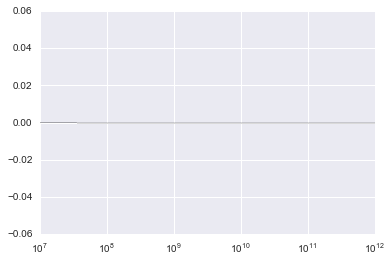

In [20]:


slct_data=[]
for h in range(3,4):
    for r in range(0,11):
        red=r/10.0
        #print h,red
        slct_data.append(list(all_data.loc[(all_data["height_dc"] == h) & (all_data["permeability"]==red),
                                     "interactions_total"]))
slct_data=list(itertools.chain(*slct_data))
#print slct_data
f = plt.figure()
plt.hist(slct_data, bins=numpy.logspace(7.0, 12.0, 10))
plt.gca().set_xscale("log")
#_ = plt.hist(slct_data,bins=numpy.logspace(0, 12,12),color="red",alpha=0.25) #,bins=numpy.logspace(0, 12)

In [14]:
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D

In [3]:
all_data['int_log']=all_data.apply(lambda row: numpy.log10(row['interactions_total']),axis=1)
# all_data['int_log']=all_data.apply(lambda row: numpy.log10(row['interactions_type']),axis=1)

NameError: name 'all_data' is not defined

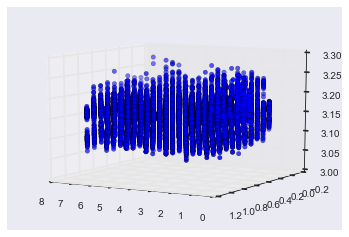

In [24]:
fig=plt.figure()
ax=fig.add_subplot(111, projection='3d')
ax.scatter(list(all_data['num_bh']),
               list(all_data['permeability']),
               list(all_data['int_log']))
#ax.set_zscale('log')
#ax.set_zlim(10**20,10**12)
ax.view_init(elev=10.,azim=120)
#for ii in xrange(0,360,1):
    #ax.view_init(elev=10., azim=ii)
    #fig.savefig("movie{}.png".format(ii))

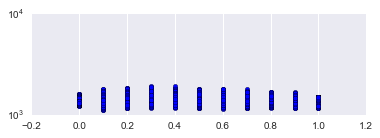

In [26]:
#transitions for fullh_noexc
fig=plt.figure()
ax=fig.add_subplot(2,1,1)
# ax.scatter(all_data['permeability'],all_data['interactions_total'])
ax.scatter(all_data['permeability'],all_data['interactions_type'])
ax.set_yscale('log')

In [37]:
averages=all_data.groupby(['num_bh','permeability','redundancy']).mean()
averages

height_dc  interactions_type  node_type  \
num_bh permeability redundancy                                            
1      0.0          1                   3            1350.52     706.40   
                    2                   3            1460.28     738.36   
                    3                   3            1462.00     740.16   
                    4                   3            1464.36     742.04   
       0.1          1                   3            1317.52     678.02   
                    2                   3            1478.02     733.92   
                    3                   3            1465.28     727.78   
                    4                   3            1480.72     734.98   
       0.2          1                   3            1314.74     671.82   
                    2                   3            1491.10     732.96   
                    3                   3            1499.52     737.24   
                    4                   3            1484.72     727.92   
       0.3          1                   3            1290.30     658.54   
                    2                   3            1461.22     715.84   
                    3                   3            1505.04     737.00   
                    4                   3            1521.54     742.48   
       0.4          1                   3            1278.40     650.62   
                    2                   3            1457.74     712.74   
                    3                   3            1496.10     730.22   
                    4                   3            1462.90     714.04   
       0.5          1                   3            1260.42     644.40   
                    2                   3            1470.40     718.14   
                    3                   3            1494.88     729.42   
                    4                   3            1502.52     732.24   
       0.6          1                   3            1262.68     645.46   
                    2                   3            1470.76     717.22   
                    3                   3            1470.36     717.40   
                    4                   3            1469.30     716.66   
       0.7          1                   3            1268.74     649.78   
                    2                   3            1446.38     705.80   
...                                   ...                ...        ...   
7      0.3          3                   3            1434.44     727.48   
                    4                   3            1434.66     723.94   
       0.4          1                   3            1298.54     665.04   
                    2                   3            1426.28     713.04   
                    3                   3            1431.04     714.78   
                    4                   3            1460.80     726.24   
       0.5          1                   3            1304.02     667.98   
                    2                   3            1424.56     707.08   
                    3                   3            1461.06     722.66   
                    4                   3            1444.98     716.22   
       0.6          1                   3            1294.64     660.80   
                    2                   3            1429.68     706.62   
                    3                   3            1464.68     723.14   
                    4                   3            1472.58     726.32   
       0.7          1                   3            1283.62     655.36   
                    2                   3            1443.56     708.02   
                    3                   3            1485.92     728.12   
                    4                   3            1464.92     721.44   
       0.8          1                   3            1283.26     655.66   
                    2                   3            1458.34     714.34   
                    3                   3            1487

In [38]:
#av_sep=averages.unstack(level=1)
av_sep=averages.reset_index()
av_sep.loc[av_sep['redundancy']==1]

#all_data.loc[(all_data["height_dc"] == h)

,num_bh,permeability,redundancy,height_dc,interactions_type,node_type,edge_type,"(4, 2, 2)","(3, 0, 3)","(7, 1, 3)",...,"((0, 1, 3), (1, 1, 3))","((5, 1, 4), (5, 2, 4))","((4, 0, 1), (3, 0, 1))","((5, 2, 4), (4, 2, 4))","((5, 2, 4), (5, 2, 5))","((6, 2, 3), (6, 1, 3))","((6, 2, 1), (6, 1, 1))","((2, 1, 2), (2, 2, 2))","((2, 1, 0), (2, 2, 0))",int_log
0,1,0.0,1,3,1350.52,706.40,644.12,1.00,1.0,2.04,...,12.48,1.0,1.00,1.0,1.0,1.0,1.00,1.00,1.00,3.130381
4,1,0.1,1,3,1317.52,678.02,639.50,2.82,1.0,1.86,...,10.40,1.0,2.26,1.0,1.0,1.0,1.12,1.72,1.60,3.119483
8,1,0.2,1,3,1314.74,671.82,642.92,1.90,1.0,1.78,...,11.52,1.0,2.42,1.0,1.0,1.0,1.24,1.34,1.84,3.118537
12,1,0.3,1,3,1290.30,658.54,631.76,1.96,1.0,1.70,...,10.64,1.0,1.80,1.0,1.0,1.0,1.22,1.58,1.82,3.110405
16,1,0.4,1,3,1278.40,650.62,627.78,1.46,1.0,1.74,...,9.84,1.0,1.50,1.0,1.0,1.0,1.20,1.12,1.66,3.106498
20,1,0.5,1,3,1260.42,644.40,616.02,1.54,1.0,1.76,...,9.12,1.0,1.52,1.0,1.0,1.0,1.04,1.46,1.42,3.100222
24,1,0.6,1,3,1262.68,645.46,617.22,1.24,1.0,1.68,...,8.56,1.0,1.22,1.0,1.0,1.0,1.04,1.22,1.30,3.101128
28,1,0.7,1,3,1268.74,649.78,618.96,1.18,1.0,1.76,...,9.20,1.0,1.22,1.0,1.0,1.0,1.02,1.10,1.22,3.103212
32,1,0.8,1,3,1259.98,644.12,615.86,1.04,1.0,1.66,...,10.56,1.0,1.06,1.0,1.0,1.0,1.02,1.04,1.38,3.100183
36,1,0.9,1,3,1250.04,640.88,609.16,1.02,1.0,1.78,...,10.00,1.0,1.04,1.0,1.0,1.0,1.00,1.02,1.06,3.096827


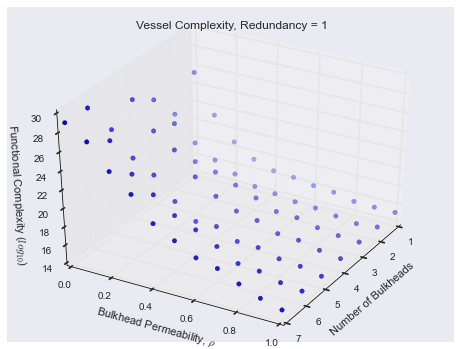

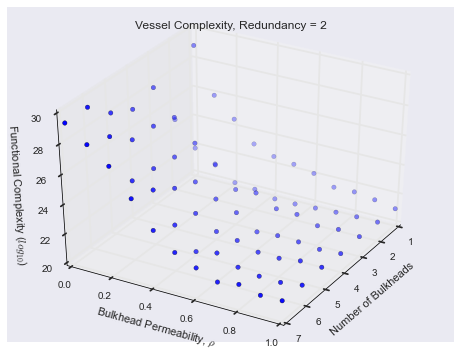

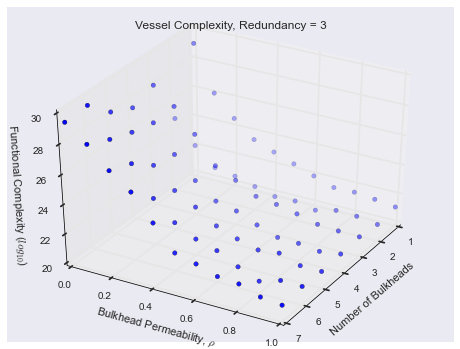

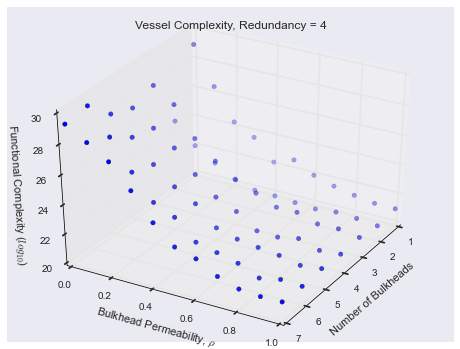

In [29]:
path_viz="C:\Users\colinsh\Documents\compship\Data\pics"

for red in xrange(1,5):
    fig_data=av_sep.loc[av_sep['redundancy']==red]
    fig=plt.figure(figsize=(8,6))
    ax=fig.add_subplot(111, projection='3d')
    ax.scatter(fig_data['num_bh'],
                   fig_data['permeability'],
                   fig_data['int_log'])
    ax.set_xlim(1,7)
    ax.set_ylim(0.0,1.0)
    ax.set_title('Vessel Complexity, Redundancy = {0}'.format(red))
    ax.set_xlabel('Number of Bulkheads')
    ax.set_ylabel(r'Bulkhead Permeability, $\rho$')
    ax.set_zlabel('Functional Complexity ($log_{10}$)')
    ax.view_init(elev=35.,azim=30)
    filename='functional_complexity_red{0}.png'.format(red)
    filename=os.path.join(path_viz, filename)
#     fig.savefig(filename,transparent=True)

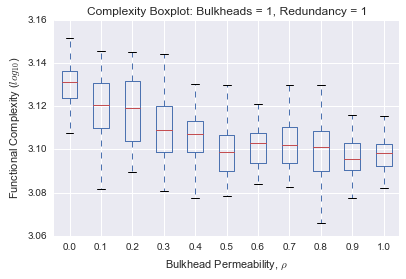

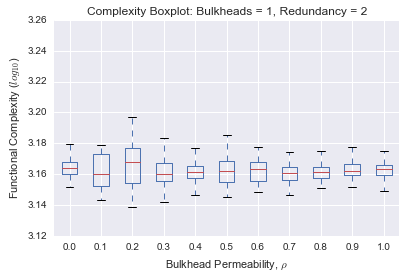

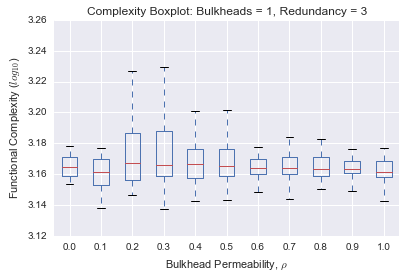

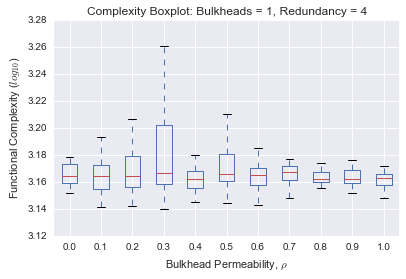

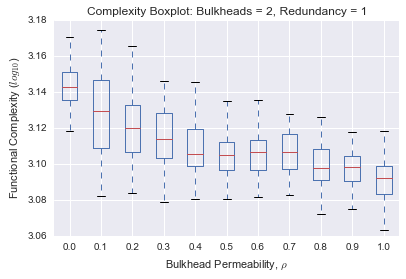

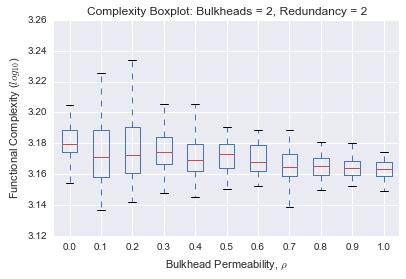

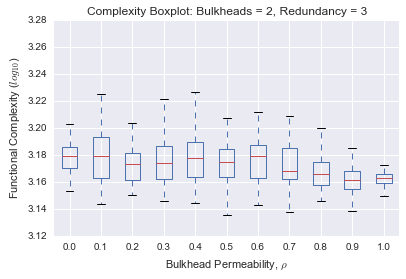

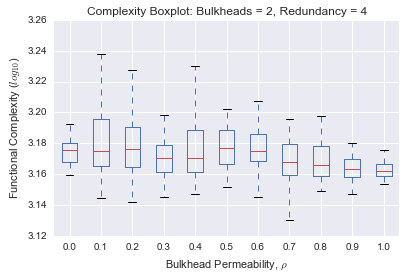

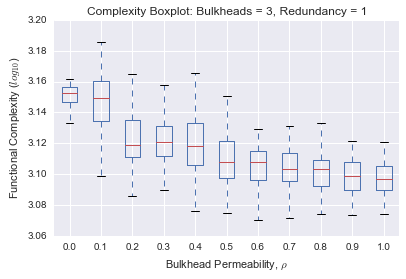

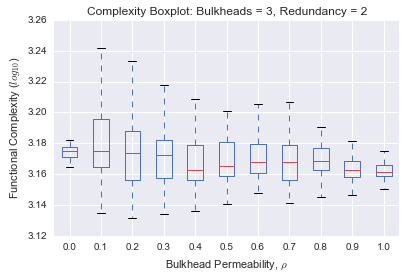

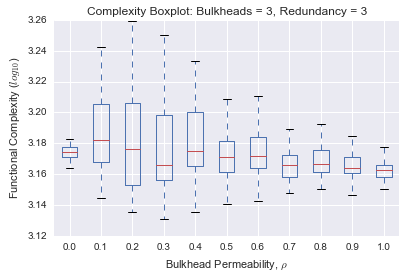

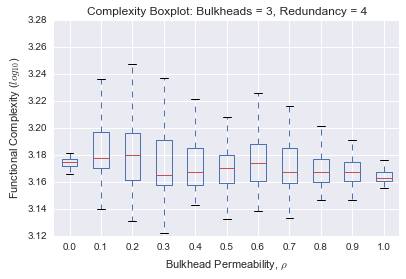

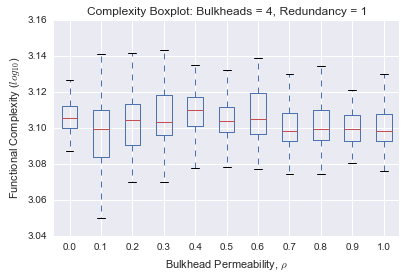

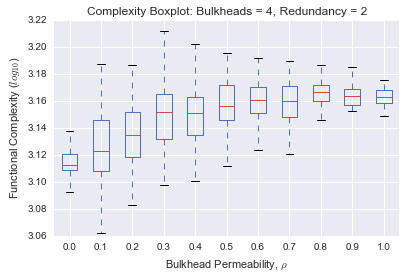

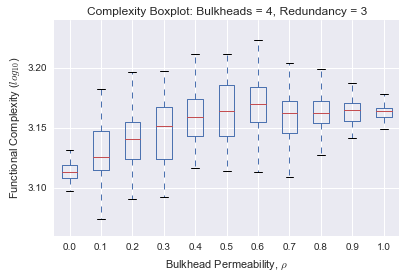

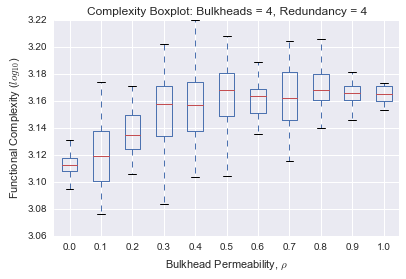

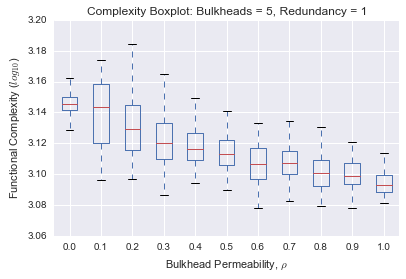

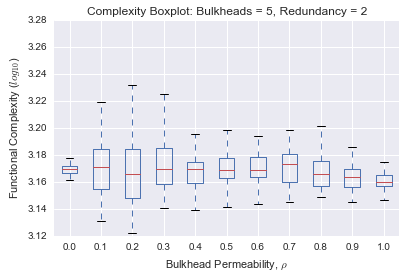

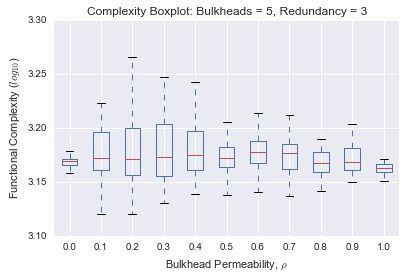

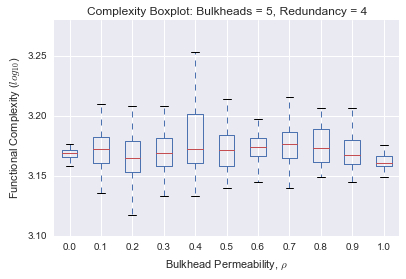

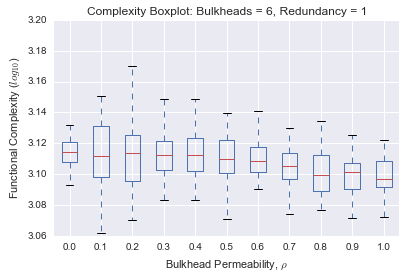

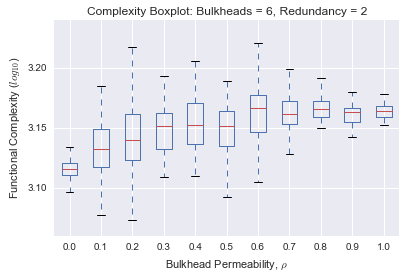

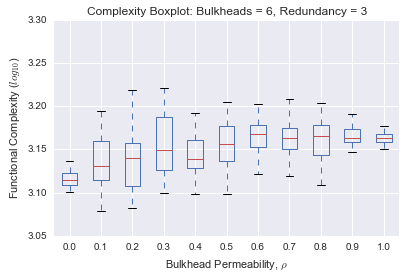

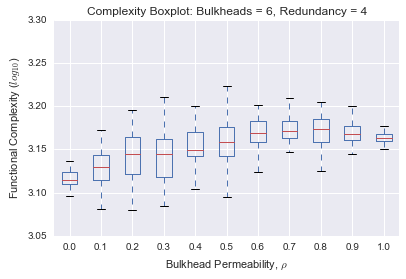

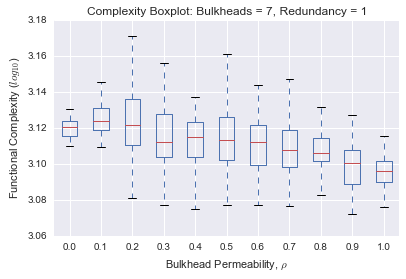

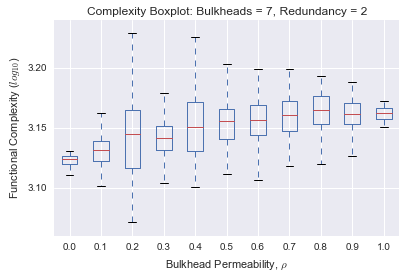

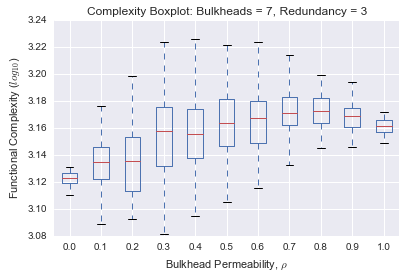

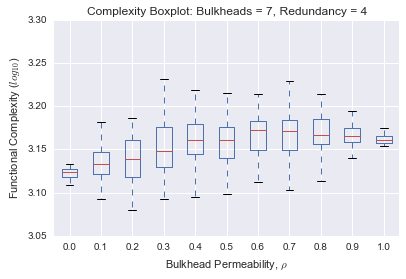

In [22]:
path_viz="C:\Users\colinsh\Documents\simpleship_wred_50\Pictures"



for bh in xrange(1,8):
    for red in xrange(1,5):
        axes=all_data.loc[(all_data['num_bh']==bh) & (all_data['redundancy']==red)].boxplot(column='int_log',by='permeability')

        fig_title='Complexity Boxplot: Bulkheads = {0}, Redundancy = {1}'.format(bh,red)
        fig=axes.get_figure()
        fig.suptitle('')
        plt.xlabel(r'Bulkhead Permeability, $\rho$')
        plt.ylabel('Functional Complexity ($log_{10}$)')
#         plt.ylim(12,32)
        plt.title(fig_title)
        filename='boxplot_bh{0}_red{1}'.format(bh,red)
        filename=os.path.join(path_viz, filename)
#         plt.savefig(filename,transparency=True)




0.0 DescribeResult(nobs=50L, minmax=(23.577440650724732, 26.492333343726585), mean=25.292779951000917, variance=0.44289073273852292, skewness=-0.2613573610239157, kurtosis=0.013310604776288315)
0.1 DescribeResult(nobs=50L, minmax=(16.742272740384863, 27.695184440825308), mean=23.246942369707941, variance=5.2352427094113283, skewness=-0.7980288399625832, kurtosis=0.395667496360403)
0.2 DescribeResult(nobs=50L, minmax=(15.670614677111889, 24.986449467491799), mean=19.618672914456546, variance=5.2800492968687198, skewness=0.6575061123031103, kurtosis=-0.043006908626817886)
0.3 DescribeResult(nobs=50L, minmax=(15.480979320237918, 24.710795611962073), mean=19.015754892151467, variance=5.2783318527787921, skewness=0.7750772002366596, kurtosis=-0.015370803696888036)
0.4 DescribeResult(nobs=50L, minmax=(14.836860949261164, 22.577251350128456), mean=18.130467198642169, variance=3.1039346626468465, skewness=0.5319555203082758, kurtosis=-0.11451204684338379)
0.5 DescribeResult(nobs=50L, minmax=(1

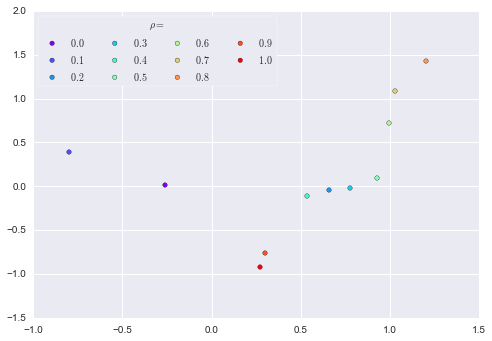

In [58]:
### PRADS Paper Analysis ###
axes=plt.figure()
#markers=['.','o','v','^','<','>','1','2','3','4','8']
color=iter(cm.rainbow(numpy.linspace(0,1,11)))
                
for p in xrange(0,11):
    perm=p/10.0
    df=all_data.loc[(all_data['num_bh']==3) & (all_data['redundancy']==1)&(all_data['permeability']==perm)]
    d=df['int_log']
    #d=df['interactions_total']
    
    #Descriptive plots
    r=sc.stats.describe(d)
    print perm, r
    c=next(color)
    plt.scatter(r[4],r[5],c=c)
    
plt.legend((r'$0.0$',r'$0.1$',r'$0.2$',r'$0.3$',r'$0.4$',r'$0.5$',r'$0.6$',r'$0.7$',r'$0.8$',r'$0.9$',r'$1.0$'),
           frameon=1,fancybox=1,loc=2,title=r'$\rho=$',ncol=4)
    
    #QQ Plots
    #axes=plt.figure()
    #_=sc.stats.probplot(d['int_log'], dist="norm",plot=plt) #int_log interactions_total
    #fig=axes.get_figure()
    #plt.title(r'Probablity Plot for $\rho={}$'.format(perm))

In [43]:
# print all_data[nodes]
node_10=all_data.apply(lambda row: numpy.log10(row[nodes]),axis=1)
node_10['num_bh']=all_data['num_bh']
node_10['perm']=all_data['permeability'].astype(float)

node_ave=node_10.groupby(['num_bh','perm']).mean()
node_ave=node_ave.reset_index()
node_ave

       (4, 2, 2)  (3, 0, 3)  (7, 1, 3)  (2, 2, 4)  (7, 2, 3)  (6, 0, 0)  \
0            1.0        1.0        1.0        1.0        1.0        1.0   
1            1.0        1.0        2.0        1.0        1.0        1.0   
2            1.0        1.0        2.0        1.0        1.0        1.0   
3            1.0        1.0        2.0        1.0        1.0        1.0   
4            1.0        1.0        4.0        1.0        1.0        1.0   
5            1.0        1.0        2.0        1.0        1.0        1.0   
6            1.0        1.0        2.0        1.0        1.0        1.0   
7            1.0        1.0        4.0        1.0        1.0        1.0   
8            1.0        1.0        2.0        1.0        1.0        1.0   
9            1.0        1.0        2.0        1.0        1.0        1.0   
10           1.0        1.0        2.0        1.0        1.0        1.0   
11           1.0        1.0        2.0        1.0        1.0        1.0   
12           1.0        1

AttributeError: ("'float' object has no attribute 'log10'", u'occurred at index 0')

In [35]:
bh=7
p=.1

for n in xrange(0,11):
    p=n/10.0
    axes=node_ave.loc[(node_ave['num_bh']==bh) & (node_ave['perm']==p)].transpose().hist()
    fig.suptitle('')
    fig_title='Node Complexity Histogram: Bulkheads = {}, Permeability = {}'.format(bh,p)
    plt.xlabel('Average Functional Complexity ($log_{10}$)')
    plt.ylabel('Node Frequency')
    plt.xlim(0,35)
    plt.gca().set_yscale('log')
    plt.title(fig_title)
    save_title='n_hist_bh{}_p{}.png'.format(bh,n)
#     plt.savefig(save_title,transparency=True)


NameError: name 'node_ave' is not defined

In [36]:
edge_10=all_data.apply(lambda row: numpy.log10(row[edges]),axis=1)
edge_10['num_bh']=all_data['num_bh']
edge_10['perm']=all_data['permeability'].astype(float)

edge_ave=edge_10.groupby(['num_bh','perm']).mean()
edge_ave=edge_ave.reset_index()
edge_ave

AttributeError: ("'float' object has no attribute 'log10'", u'occurred at index 0')

In [30]:
bh=3


for n in xrange(0,11):
    p=n/10.0
    axes=edge_ave.loc[(edge_ave['num_bh']==bh) & (edge_ave['perm']==p)].transpose().hist()
    fig.suptitle('')
    fig_title='Edge Complexity Histogram: Bulkheads = {}, Permeability = {}'.format(bh,p)
    plt.xlabel('Average Functional Complexity ($log_{10}$)')
    plt.ylabel('Edge Frequency')
    plt.xlim(0,25)
    plt.gca().set_yscale('log')
    plt.title(fig_title)
    save_title='e_hist_bh{}_p{}.png'.format(bh,n)
#     plt.savefig(save_title,transparency=True)

NameError: name 'edge_ave' is not defined

In [88]:
# print node_ave.loc[(node_ave['num_bh']==3) & (node_ave['perm']==1.0)].max()

In [6]:
# Establish all nodes, edges, mid-lines.
ship=ShipNET([8,3,6])
for x in range(2):
    for z in range (4,6):
        for y in range(3):
            ship.remove_ship_node((x,y,z))
for x in range(6,8):
    for z in range (4,6):
        for y in range(3):
            ship.remove_ship_node((x,y,z))
ship.remove_ship_node((0,0,0))
ship.remove_ship_node((0,1,0))
ship.remove_ship_node((0,2,0))

nodes=[]
for n in ship.ship.nodes():
    nodes.append(str(n))

edges=[]
for e in ship.ship.edges():
    edges.append(str(e))
    
mid_nodes=[]
for n in ship.ship.nodes():
    if n[1]==1:
        mid_nodes.append(str(n))

mid_edges=[]
for e in ship.ship.edges():
    if e[0][1]==1 and e[1][1]==1:
        mid_edges.append(str(e))

mid_all=mid_nodes + mid_edges
# print mid_all
        
# print mid_nodes 
# print mid_edges

In [7]:
#histograms of mid line for all interactions
# print all_data.head(1)
all_data = pd.read_csv(os.path.join("simpleship_wred_50", "series_all.csv"),index_col=None)
all_data['int_log']=all_data.apply(lambda row: numpy.log10(row['interactions_total']),axis=1)
int_all_mean=all_data.groupby(['num_bh','permeability','redundancy']).mean()
int_all_mean=int_all_mean.reset_index()
print int_all_mean

node_10=all_data.apply(lambda row: numpy.log10(row[mid_nodes].astype(float)),axis=1)
node_10['num_bh']=all_data['num_bh']
node_10['perm']=all_data['permeability'].astype(float)

node_ave=node_10.groupby(['num_bh','perm']).mean()
node_ave=node_ave.reset_index()
# node_ave

edge_10=all_data.apply(lambda row: numpy.log10(row[mid_edges].astype(float)),axis=1)
edge_10['num_bh']=all_data['num_bh']
edge_10['perm']=all_data['permeability'].astype(float)

edge_ave=edge_10.groupby(['num_bh','perm']).mean()
edge_ave=edge_ave.reset_index()
# edge_ave

all_10=all_data.apply(lambda row: numpy.log10(row[mid_all].astype(float)),axis=1)
all_10['num_bh']=all_data['num_bh']
all_10['perm']=all_data['permeability'].astype(float)

all_ave=all_10.groupby(['num_bh','perm']).mean()
all_ave=all_ave.reset_index()
# all_ave

     num_bh  permeability  redundancy  height_dc  interactions_total  \
0         1           0.0           1          3        1.044790e+26   
1         1           0.0           2          3        1.857160e+29   
2         1           0.0           3          3        2.357040e+29   
3         1           0.0           4          3        1.744013e+29   
4         1           0.1           1          3        1.102089e+26   
5         1           0.1           2          3        5.999389e+28   
6         1           0.1           3          3        1.169013e+29   
7         1           0.1           4          3        9.469414e+28   
8         1           0.2           1          3        1.414466e+25   
9         1           0.2           2          3        6.600258e+28   
10        1           0.2           3          3        6.994822e+28   
11        1           0.2           4          3        2.734548e+28   
12        1           0.3           1          3        2.684083

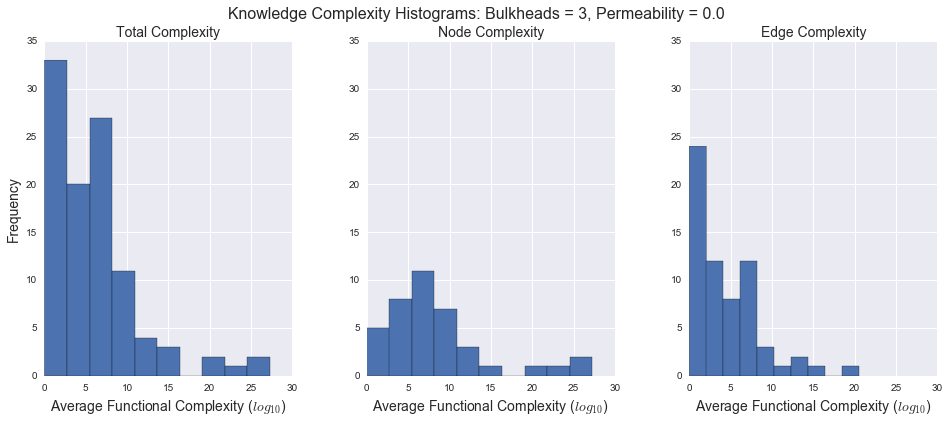

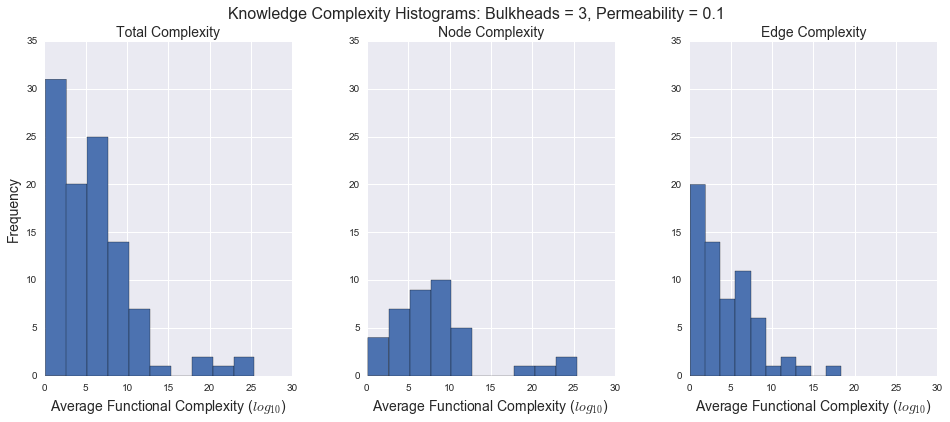

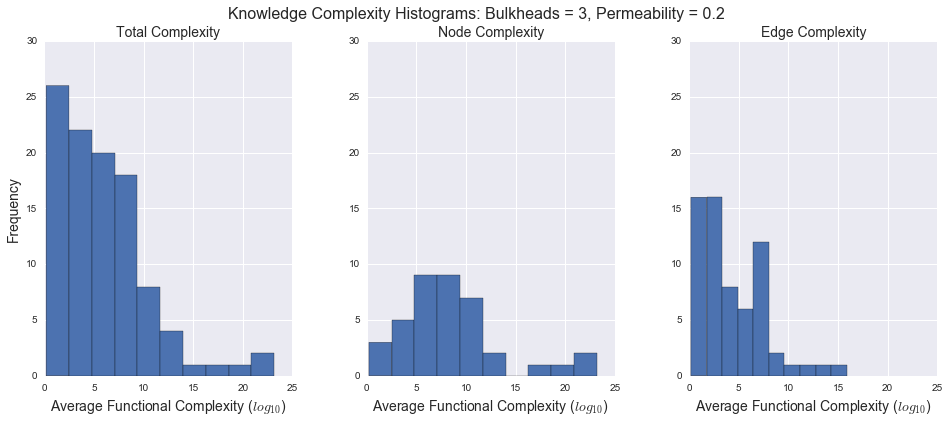

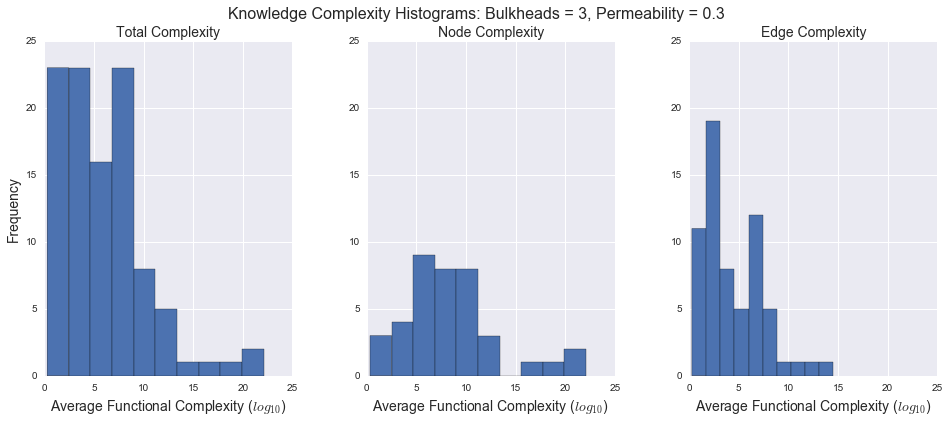

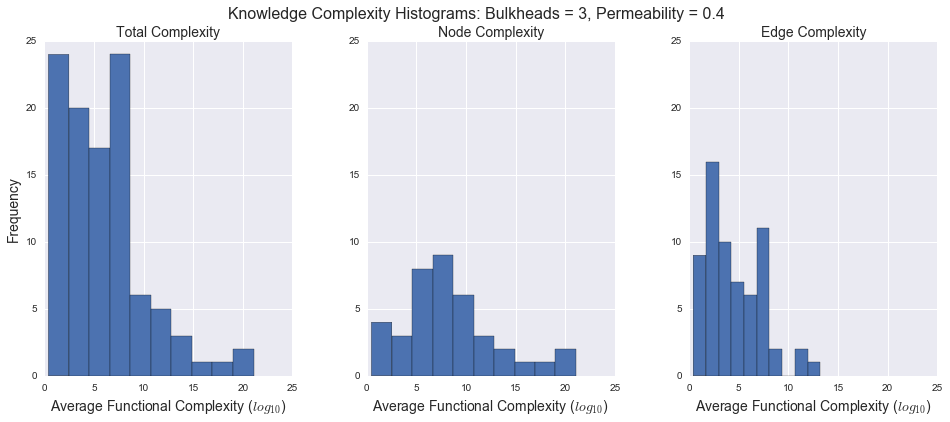

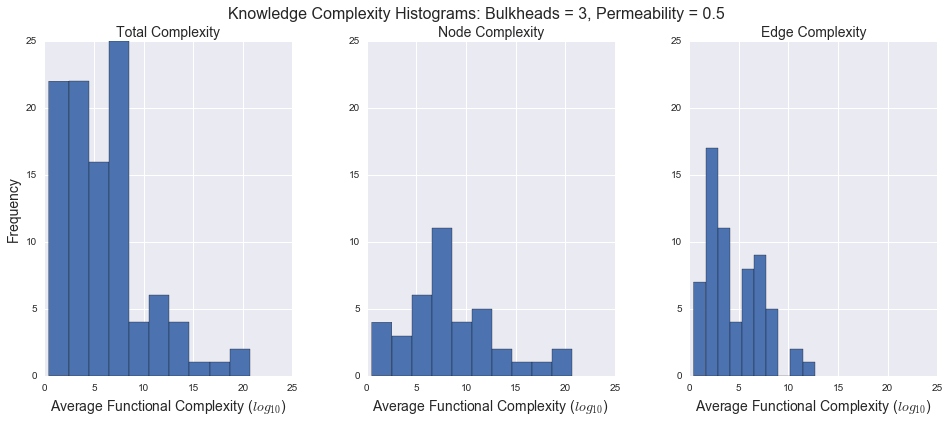

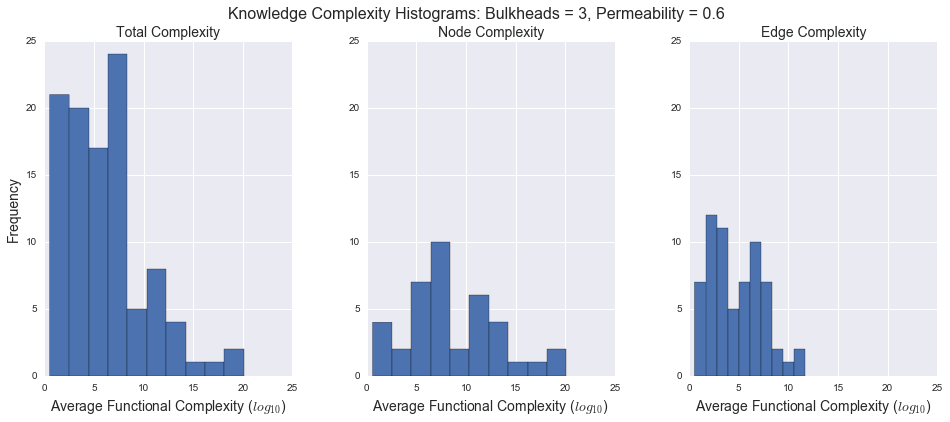

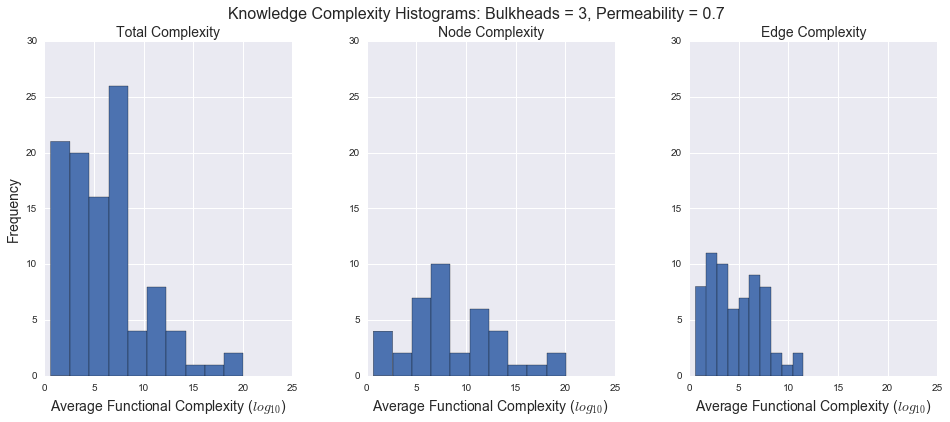

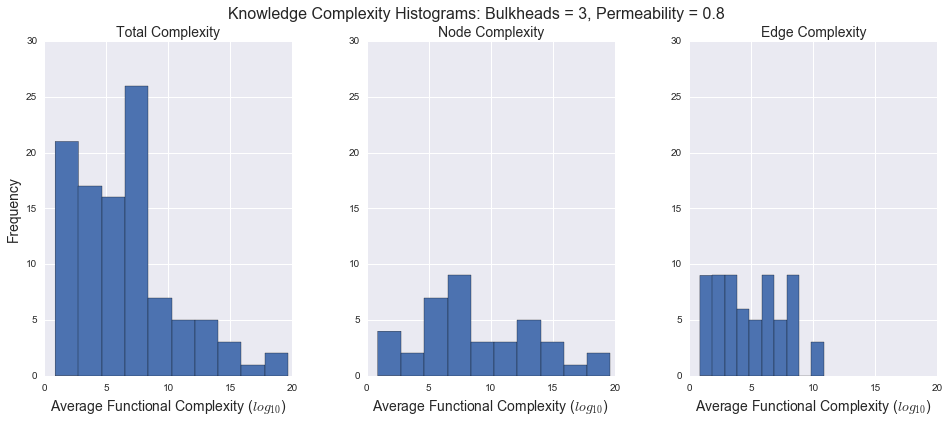

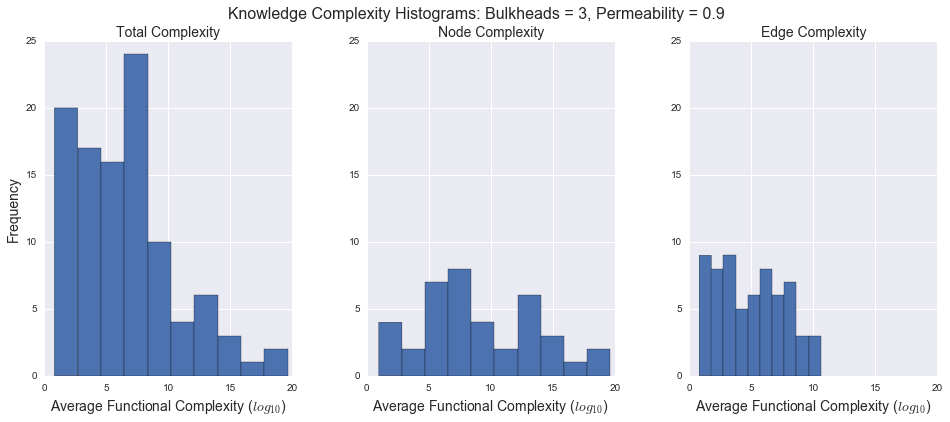

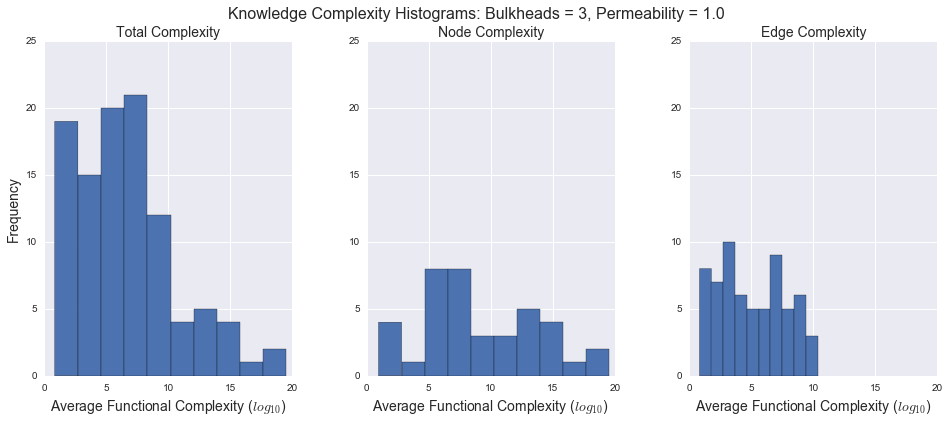

In [66]:
bh=3
figsize=(16,6)
fs_sup=16
fs_sub=14
ylim=[0,35]
xlim=[0,30]
bins=10
use_tot_lims=True
set_lims=False
y_log=False

for n in xrange(0,11):
    p=n/10.0
        
    f,a = plt.subplots(1,3,figsize=figsize)
    sup_title='Knowledge Complexity Histograms: Bulkheads = {}, Permeability = {}'.format(bh,p)
    f.suptitle(sup_title,fontsize=fs_sup)
    
    axes=all_ave[mid_all].loc[(all_ave['num_bh']==bh) & (all_ave['perm']==p)].transpose().hist(ax=a[0],bins=bins)
    a[0].set_title('Total Complexity',fontsize=fs_sub)
    a[0].set_xlabel('Average Functional Complexity ($log_{10}$)',fontsize=fs_sub)
    a[0].set_ylabel('Frequency',fontsize=fs_sub)
    if set_lims:    
        a[0].set_ylim(ylim)
        a[0].set_xlim(xlim)
    if y_log:
        a[0].set_yscale('log')
    if use_tot_lims:
        xtot_lim=a[0].get_xlim()
        ytot_lim=a[0].get_ylim()
        
#     plt.xlim(0,25)
#     plt.gca().set_yscale('log')

    
    axes=node_ave[mid_nodes].loc[(node_ave['num_bh']==bh) & (node_ave['perm']==p)].transpose().hist(ax=a[1],bins=bins)
    a[1].set_title('Node Complexity',fontsize=fs_sub)
    a[1].set_xlabel('Average Functional Complexity ($log_{10}$)',fontsize=fs_sub)
    if set_lims:    
        a[1].set_ylim(ylim)
        a[1].set_xlim(xlim)
    if y_log:
        a[1].set_yscale('log')
    if use_tot_lims:
        a[1].set_ylim(ytot_lim)
        a[1].set_xlim(xtot_lim)
#     plt.ylabel('Node Frequency')
#     plt.xlim(0,35)
#     a[0].set_yscale('log')
    save_title='n_hist_bh{}_p{}.png'.format(bh,n)
#     plt.savefig(save_title,transparency=True)

    axes=edge_ave[mid_edges].loc[(edge_ave['num_bh']==bh) & (edge_ave['perm']==p)].transpose().hist(ax=a[2],bins=bins)
    a[2].set_title('Edge Complexity',fontsize=fs_sub)
    a[2].set_xlabel('Average Functional Complexity ($log_{10}$)',fontsize=fs_sub)
    if set_lims:    
        a[2].set_ylim(ylim)
        a[2].set_xlim(xlim)
    if y_log:
        a[2].set_yscale('log')
    if use_tot_lims:
        a[2].set_ylim(ytot_lim)
        a[2].set_xlim(xtot_lim)
#     plt.ylabel('Edge Frequency')
#     plt.xlim(0,25)
#     plt.gca().set_yscale('log')

    
    save_title='e_hist_bh{}_p{}.png'.format(bh,n)
#     plt.savefig(save_title,transparency=True)


In [8]:
## Histogram of midline for type interaction
t_data = pd.read_csv(os.path.join("simpleship_wred_50", "series_type.csv"),index_col=None)
t_data['int_log']=t_data.apply(lambda row: numpy.log10(row['interactions_type']),axis=1)
int_t_mean=t_data.groupby(['num_bh','permeability','redundancy']).mean()
int_t_mean=int_t_mean.reset_index()
print int_t_mean.loc[(int_t_mean['num_bh']==3) & (int_t_mean['redundancy']==1)]

t_node_10=t_data.apply(lambda row: numpy.log10(row[mid_nodes].astype(float)),axis=1)
t_node_10['num_bh']=t_data['num_bh']
t_node_10['perm']=t_data['permeability'].astype(float)

t_node_ave=t_node_10.groupby(['num_bh','perm']).mean()
t_node_ave=t_node_ave.reset_index()
# t_node_ave

t_edge_10=t_data.apply(lambda row: numpy.log10(row[mid_edges].astype(float)),axis=1)
t_edge_10['num_bh']=t_data['num_bh']
t_edge_10['perm']=t_data['permeability'].astype(float)

t_edge_ave=t_edge_10.groupby(['num_bh','perm']).mean()
t_edge_ave=t_edge_ave.reset_index()
# t_edge_ave

t_all_10=t_data.apply(lambda row: numpy.log10(row[mid_all].astype(float)),axis=1)
t_all_10['num_bh']=t_data['num_bh']
t_all_10['perm']=t_data['permeability'].astype(float)

t_all_ave=t_all_10.groupby(['num_bh','perm']).mean()
t_all_ave=t_all_ave.reset_index()
# t_all_ave

     num_bh  permeability  redundancy  height_dc  interactions_type  \
88        3           0.0           1          3            1416.26   
92        3           0.1           1          3            1400.02   
96        3           0.2           1          3            1333.10   
100       3           0.3           1          3            1326.36   
104       3           0.4           1          3            1315.38   
108       3           0.5           1          3            1291.02   
112       3           0.6           1          3            1275.54   
116       3           0.7           1          3            1271.26   
120       3           0.8           1          3            1263.64   
124       3           0.9           1          3            1255.20   
128       3           1.0           1          3            1252.18   

     node_type  edge_type  (4, 2, 2)  (3, 0, 3)  (7, 1, 3)    ...     \
88      744.04     672.22       1.00        1.0       2.60    ...      
92 

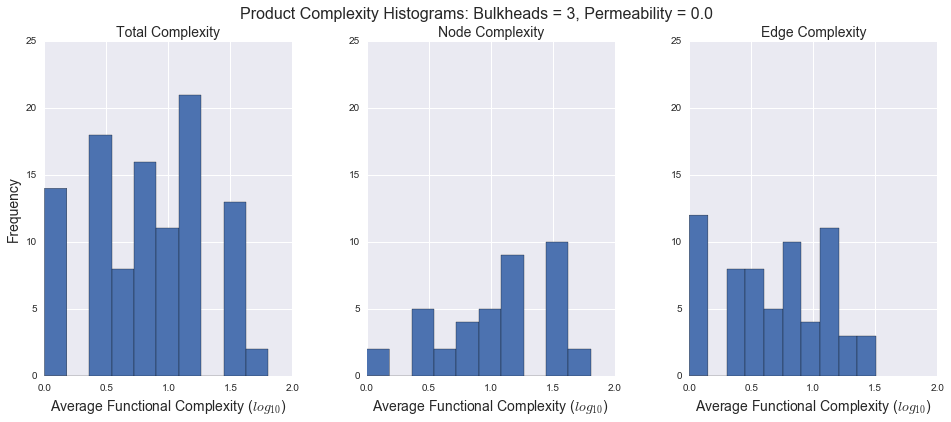

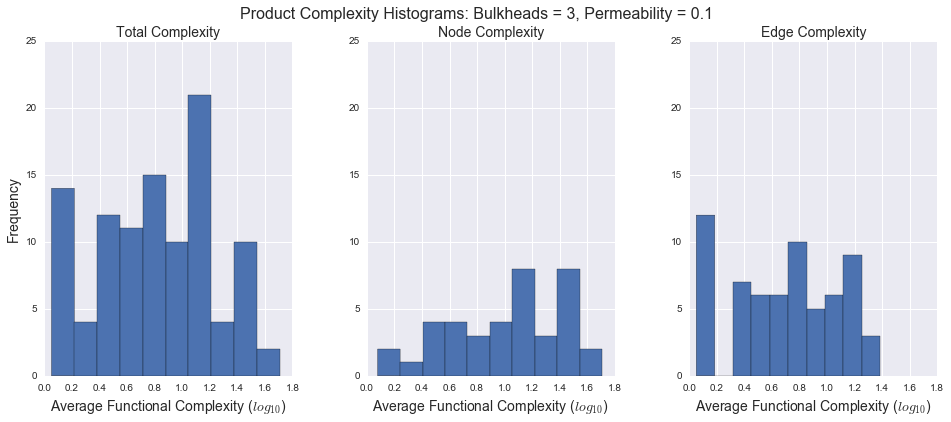

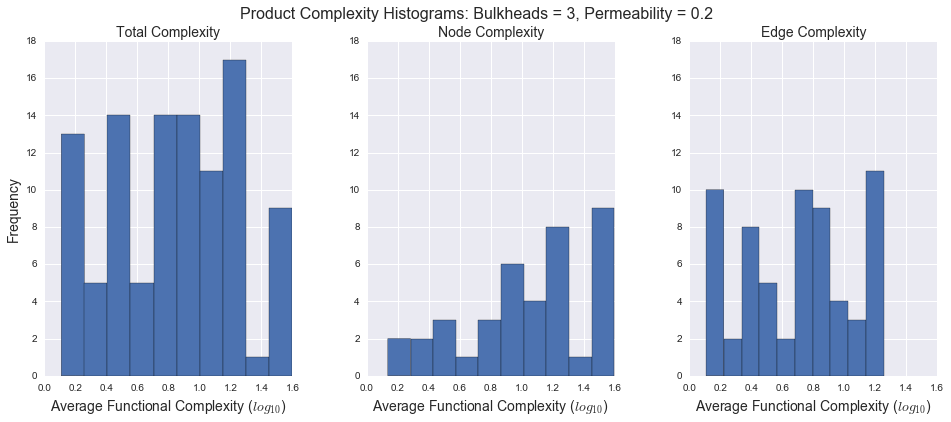

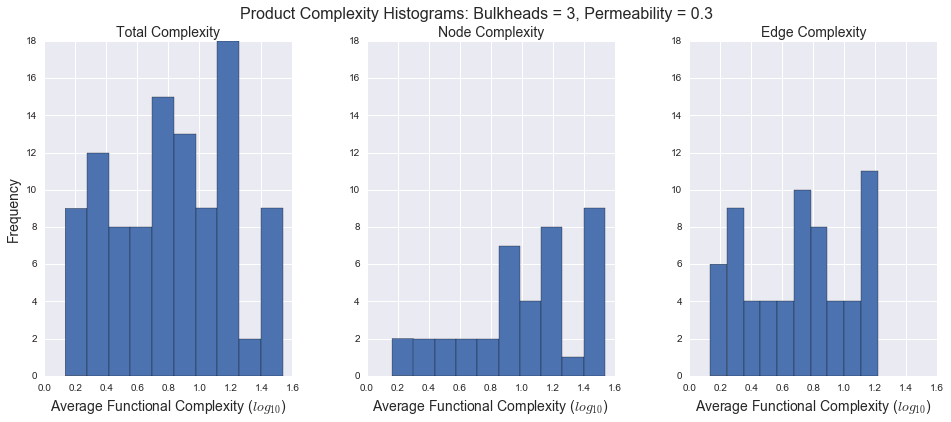

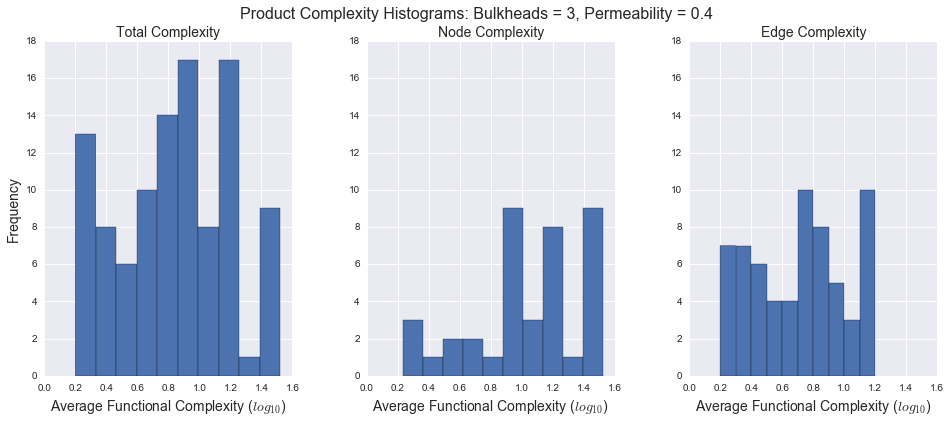

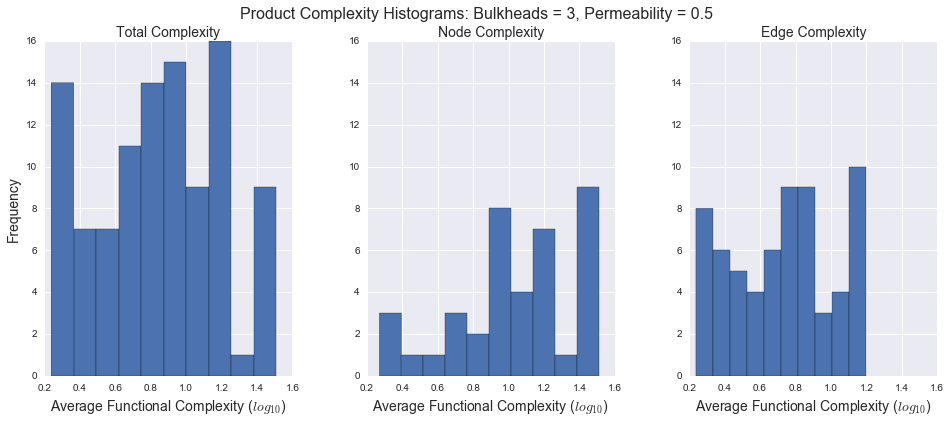

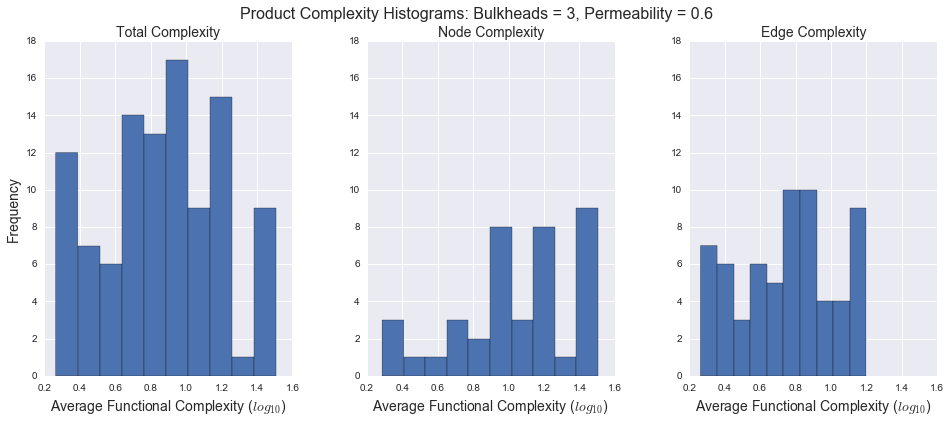

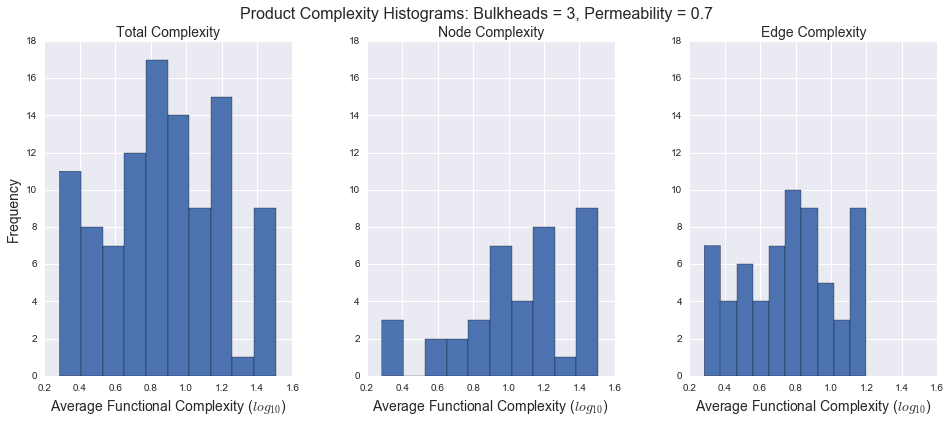

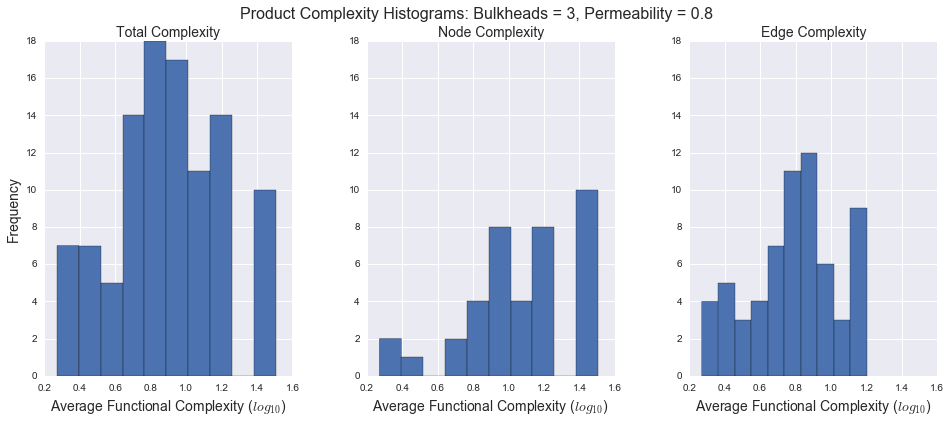

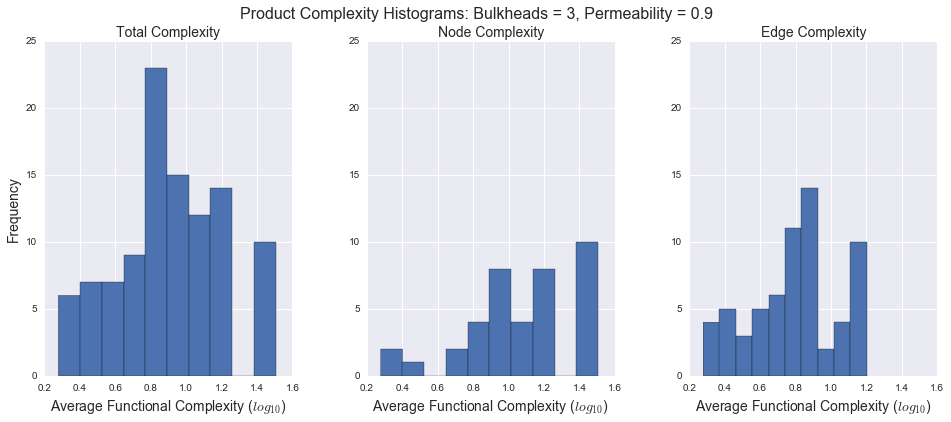

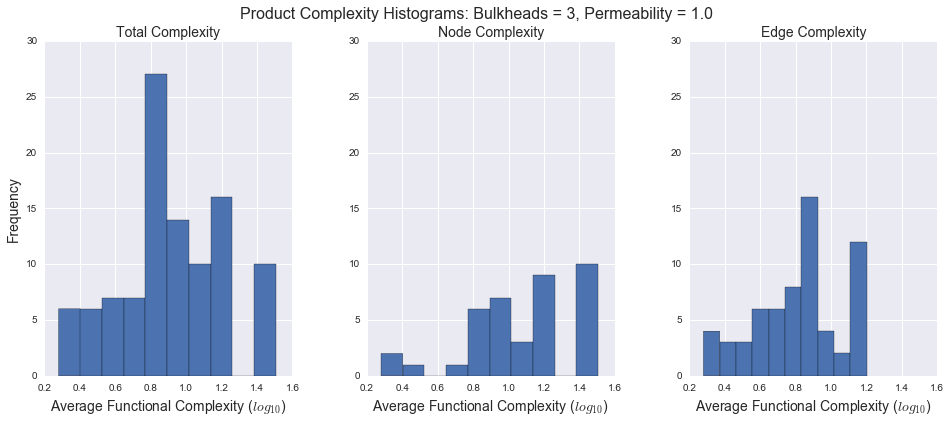

In [67]:
bh=3
figsize=(16,6)
fs_sup=16
fs_sub=14
ylim=[0,30]
xlim=[0,2]
bins=10
set_lims=False
use_tot_lims=True
y_log=False
red=1


for n in xrange(0,11):
    p=n/10.0
    f,a = plt.subplots(1,3,figsize=figsize)
    sup_title='Product Complexity Histograms: Bulkheads = {}, Permeability = {}'.format(bh,p)
    f.suptitle(sup_title,fontsize=fs_sup)
    
    axes=t_all_ave[mid_all].loc[(t_all_ave['num_bh']==bh) & (t_all_ave['perm']==p)
                               & (t_all_ave['redundancy']==1)].transpose().hist(ax=a[0], bins=bins)
    a[0].set_title('Total Complexity',fontsize=fs_sub)
    a[0].set_xlabel('Average Functional Complexity ($log_{10}$)',fontsize=fs_sub)
    a[0].set_ylabel('Frequency',fontsize=fs_sub)
    if set_lims and not y_log:
        a[0].set_ylim(ylim)
        a[0].set_xlim(xlim)
    if y_log:
        a[0].set_yscale('log')
    if use_tot_lims:
        xtot_lim=a[0].get_xlim()
        ytot_lim=a[0].get_ylim()
#     plt.xlim(0,25)
#     plt.gca().set_yscale('log')

    
    axes=t_node_ave[mid_nodes].loc[(t_node_ave['num_bh']==bh) & (t_node_ave['perm']==p)].transpose().hist(ax=a[1], bins=bins)
    a[1].set_title('Node Complexity',fontsize=fs_sub)
    a[1].set_xlabel('Average Functional Complexity ($log_{10}$)',fontsize=fs_sub)
    if set_lims and not y_log:
        a[1].set_ylim(ylim)
        a[1].set_xlim(xlim)
    if y_log:
        a[1].set_yscale('log')
    if use_tot_lims:
        a[1].set_ylim(ytot_lim)
        a[1].set_xlim(xtot_lim)
#     plt.ylabel('Node Frequency')
#     plt.xlim(0,35)
#     a[0].set_yscale('log')


    axes=t_edge_ave[mid_edges].loc[(t_edge_ave['num_bh']==bh) & (t_edge_ave['perm']==p)
                                  & (t_edge_ave['redundancy']==1)].transpose().hist(ax=a[2], bins=bins)
    a[2].set_title('Edge Complexity',fontsize=fs_sub)
    a[2].set_xlabel('Average Functional Complexity ($log_{10}$)',fontsize=fs_sub)
    if set_lims and not y_log:    
        a[2].set_ylim(ylim)
        a[2].set_xlim(xlim)
    if y_log:
        a[2].set_yscale('log')
    if use_tot_lims:
        a[2].set_ylim(ytot_lim)
        a[2].set_xlim(xtot_lim)
#     plt.ylabel('Edge Frequency')
#     plt.xlim(0,25)
#     plt.gca().set_yscale('log')

    
    save_title='e_hist_bh{}_p{}.png'.format(bh,n)
#     plt.savefig(save_title,transparency=True)

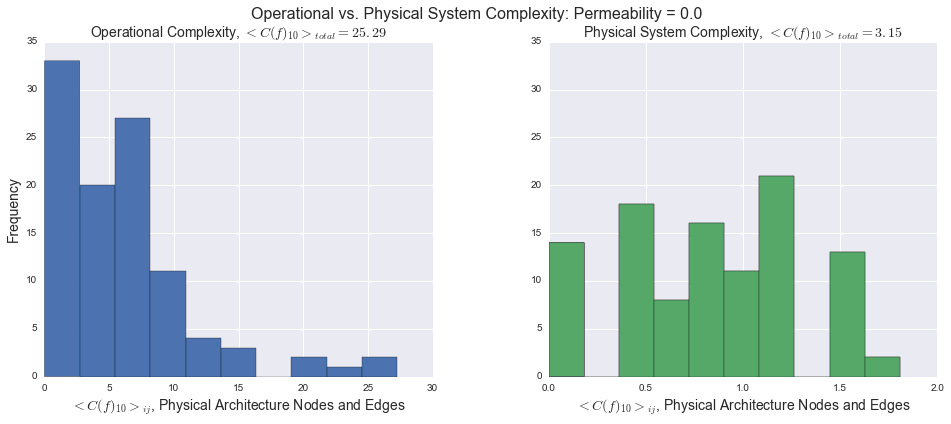

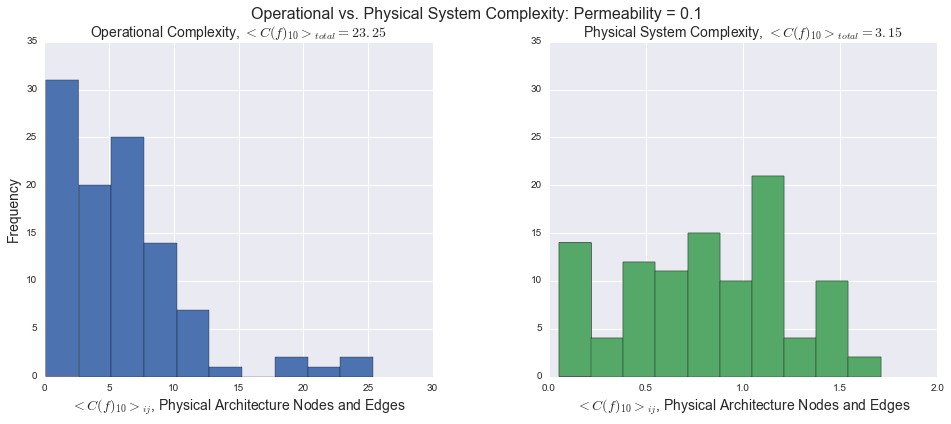

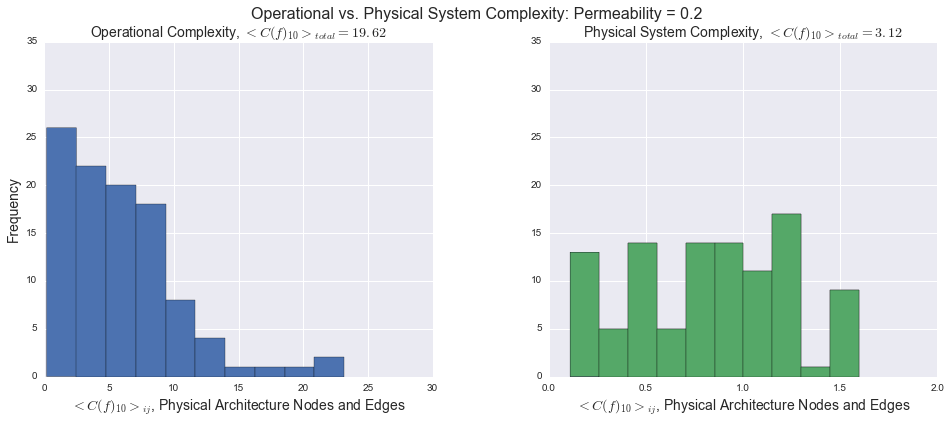

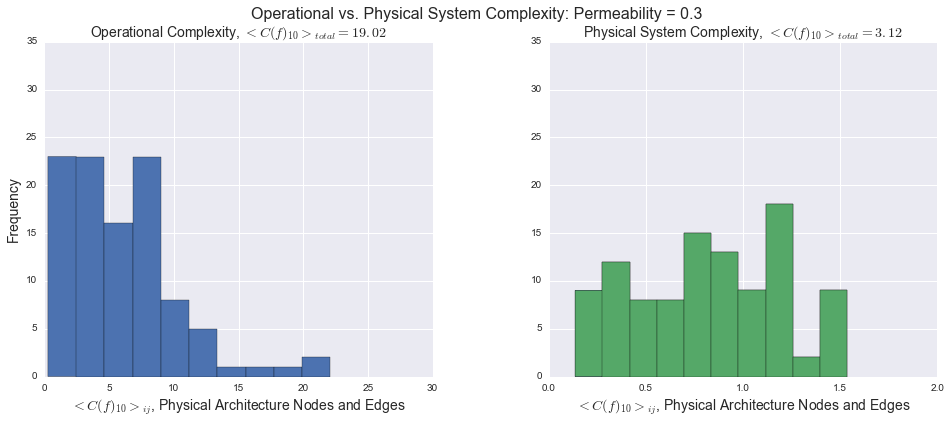

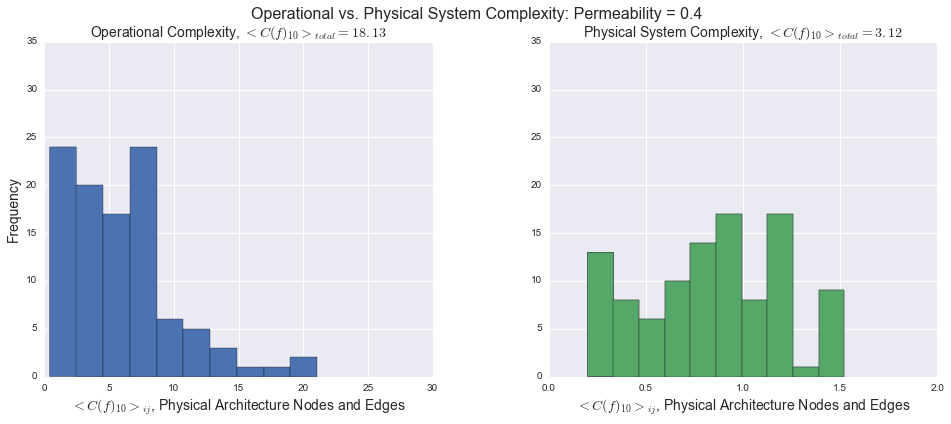

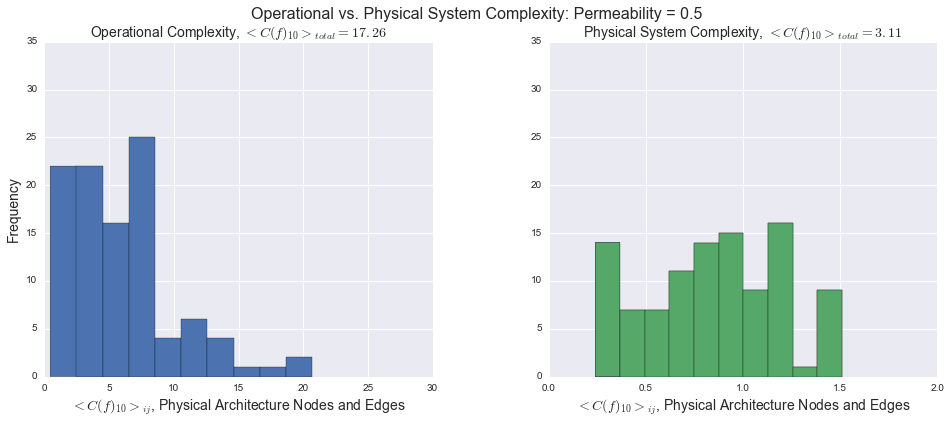

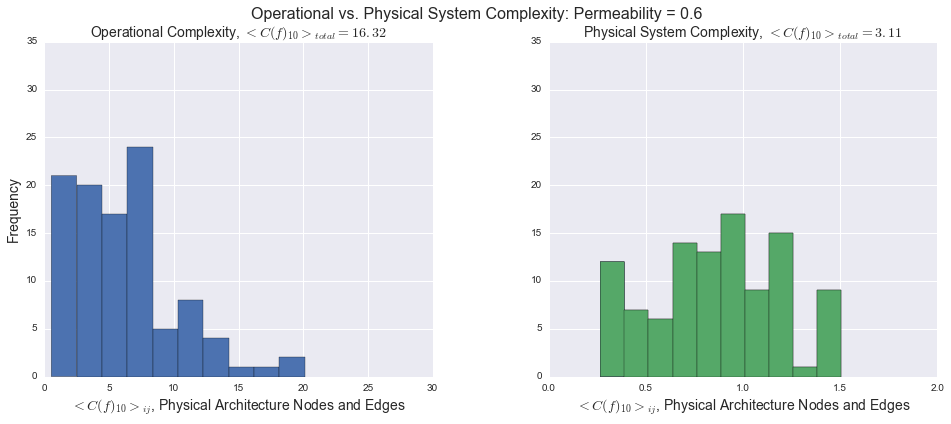

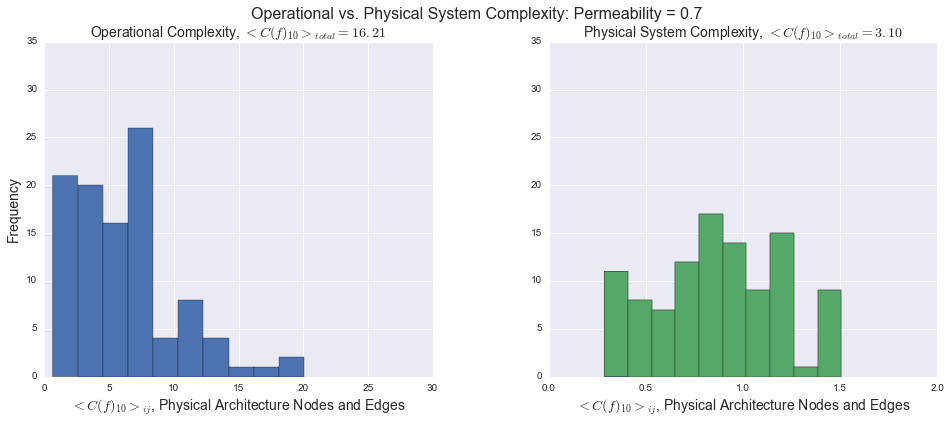

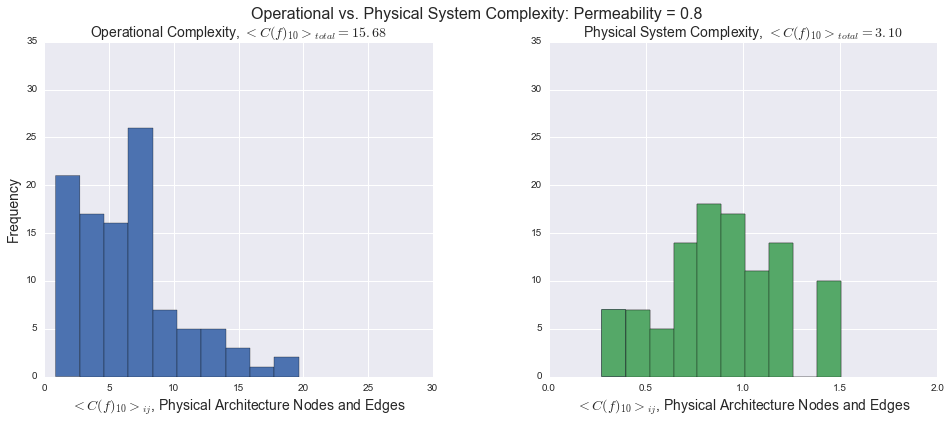

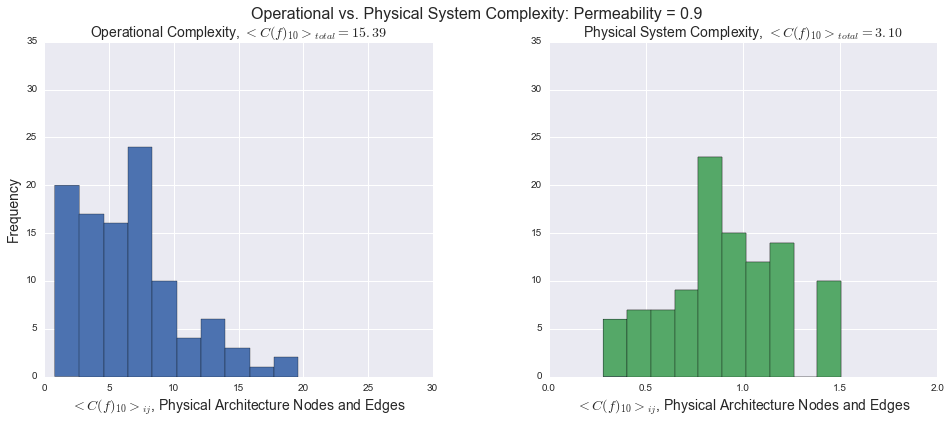

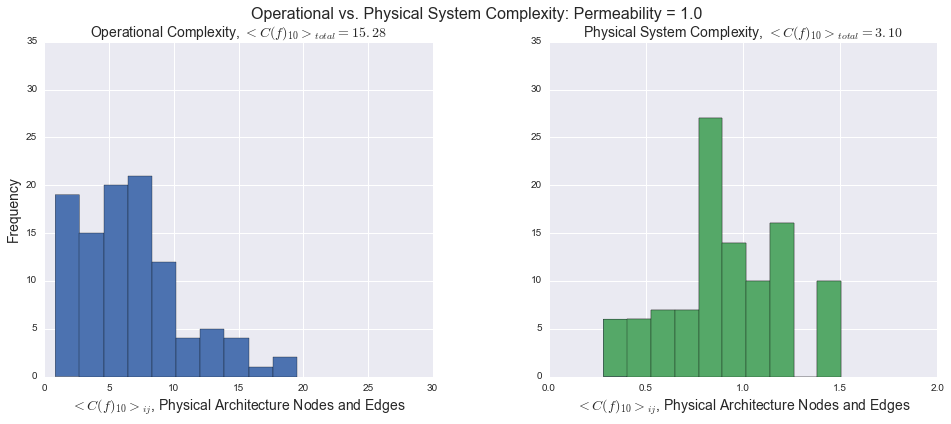

In [15]:
bh=3
figsize=(16,6)
fs_sup=16
fs_sub=14
ylim=[0,35]
xlim_p=[0,2]
xlim_d=[0,30]
bins=10
set_lims=True
use_tot_lims=True
y_log=False
xlabel='$<C(f)_{10}>_{{ij}}$, Physical Architecture Nodes and Edges'

save=False
path_viz="C:\Users\colinsh\Documents\simpleship_wred_50\Pictures"

for n in xrange(0,11):
    p=n/10.0
    f,a = plt.subplots(1,2,figsize=figsize)
#     sup_title='Product Complexity Histograms: Bulkheads = {}, Permeability = {}'.format(bh,p)
    sup_title='Operational vs. Physical System Complexity: Permeability = {}'.format(p)
    f.suptitle(sup_title,fontsize=fs_sup)
    
    tot_c=int_all_mean['int_log'].loc[(int_all_mean['num_bh']==bh) & (int_all_mean['permeability']==p) & 
                                     (int_all_mean['redundancy']==1) & (int_all_mean['height_dc']==3)].item()
    axes=all_ave[mid_all].loc[(all_ave['num_bh']==bh) & (all_ave['perm']==p)].transpose().hist(ax=a[0],bins=bins)
    axes=t_all_ave[mid_all].loc[(t_all_ave['num_bh']==bh) & (t_all_ave['perm']==p)].transpose().hist(ax=a[1], bins=bins)
#     a[0].set_title(r'Operational Complexity, $O \left( \sum C(f)_{{V{{ij}}}} \right)={:04.2f}$'.format(tot_c),fontsize=fs_sub)
    a[0].set_title(r'Operational Complexity, $<C(f)_{{10}}>_{{total}}={:04.2f}$'.format(tot_c),fontsize=fs_sub)
    a[0].set_xlabel(xlabel,fontsize=fs_sub)
    a[0].set_ylabel('Frequency',fontsize=fs_sub)
    if set_lims and not y_log:
        a[0].set_ylim(ylim)
        a[0].set_xlim(xlim_d)
    if y_log:
        a[0].set_yscale('log')
    if use_tot_lims:
        xtot_lim=a[0].get_xlim()
        ytot_lim=a[0].get_ylim()
        
    type_c=int_t_mean['int_log'].loc[(int_t_mean['num_bh']==bh) & (int_t_mean['permeability']==p) & 
                                     (int_t_mean['redundancy']==1) & (int_t_mean['height_dc']==3)].item()    
    axes=t_all_ave[mid_all].loc[(t_all_ave['num_bh']==bh) & (t_all_ave['perm']==p)].transpose().hist(ax=a[1], bins=bins)
#     a[1].set_title(r'System Complexity, $O \left( \sum C(f)_{{V_{{ij}}}} \right)={:04.2f}$'.format(type_c),fontsize=fs_sub)
    a[1].set_title(r'Physical System Complexity, $<C(f)_{{10}}>_{{total}}={:04.2f}$'.format(type_c),fontsize=fs_sub)
    a[1].set_xlabel(xlabel,fontsize=fs_sub)
    if set_lims:    
        a[1].set_ylim(ylim)
        a[1].set_xlim(xlim_p)
    if y_log:
        a[1].set_yscale('log')
    if use_tot_lims:
        a[1].set_ylim(ytot_lim)
#         a[1].set_xlim(xtot_lim)

#     plt.tight_layout()

    save_title='c_comp_bh{}_p{}.pdf'.format(bh,n)
    filename=os.path.join(path_viz, save_title)
    if save:
        plt.savefig(filename,transparency=True)

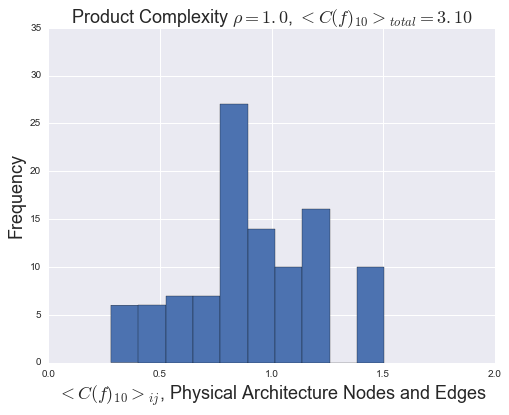

In [31]:
bh=3
figsize=(8,6)
fs_sup=16
fs_sub=18
ylim=[0,35]
xlim_p=[0,2]
xlim_d=[0,30]
bins=10
set_lims=True
use_tot_lims=True
y_log=False
xlabel='$<C(f)_{10}>_{{ij}}$, Physical Architecture Nodes and Edges'

save=False
path_viz="C:\Users\colinsh\Documents\simpleship_wred_50\Pictures"


p=1.0

f,a = plt.subplots(1,1,figsize=figsize)
#     sup_title='Product Complexity Histograms: Bulkheads = {}, Permeability = {}'.format(bh,p)
# sup_title='Knowledge Complexity: Permeability = {}'.format(p)
sup_title=''
f.suptitle(sup_title,fontsize=fs_sup)

# tot_c=int_all_mean['int_log'].loc[(int_all_mean['num_bh']==bh) & (int_all_mean['permeability']==p) & 
#                                  (int_all_mean['redundancy']==1) & (int_all_mean['height_dc']==3)].item()
# axes=all_ave[mid_all].loc[(all_ave['num_bh']==bh) & (all_ave['perm']==p)].transpose().hist(ax=a,bins=bins)
# a.set_title(r'Knowledge Complexity $\rho={}$, $<C(f)_{{10}}>_{{total}}={:04.2f}$'.format(p,tot_c),fontsize=fs_sub)

type_c=int_t_mean['int_log'].loc[(int_t_mean['num_bh']==bh) & (int_t_mean['permeability']==p) & 
                                     (int_t_mean['redundancy']==1) & (int_t_mean['height_dc']==3)].item() 
axes=t_all_ave[mid_all].loc[(t_all_ave['num_bh']==bh) & (t_all_ave['perm']==p)].transpose().hist(ax=a, bins=bins)
a.set_title(r'Product Complexity $\rho={}$, $<C(f)_{{10}}>_{{total}}={:04.2f}$'.format(p,type_c),fontsize=fs_sub)
#     a[0].set_title(r'Operational Complexity, $O \left( \sum C(f)_{{V{{ij}}}} \right)={:04.2f}$'.format(tot_c),fontsize=fs_sub)

a.set_xlabel(xlabel,fontsize=fs_sub)
a.set_ylabel('Frequency',fontsize=fs_sub)
if set_lims and not y_log:
    a.set_ylim(ylim)
#     a.set_xlim(xlim_d)
    a.set_xlim(xlim_p)
if y_log:
    a.set_yscale('log')
if use_tot_lims:
    xtot_lim=a.get_xlim()
    ytot_lim=a.get_ylim()



save_title='c_comp_bh{}_p{}.pdf'.format(bh,n)
filename=os.path.join(path_viz, save_title)
if save:
    plt.savefig(filename,transparency=True)

In [39]:
df=all_ave[mid_all].loc[(all_ave['num_bh']==3) & (all_ave['perm']==0.0)].transpose()
df[(df>15).all(axis=1)]

,22
"(4, 1, 3)",27.253751
"(5, 1, 3)",21.260243
"(2, 1, 3)",25.205242
"(3, 1, 3)",22.017334
"((4, 1, 3), (3, 1, 3))",20.555833
"((2, 1, 3), (3, 1, 3))",15.546694


In [46]:
df=t_data.groupby(['num_bh','permeability','redundancy']).median()
df=df.reset_index()
df.loc[(df['num_bh']==3) & (df['redundancy']==1)&(df['permeability']==1.0)]
# df=all_data.loc[(all_data['num_bh']==3) & (all_data['redundancy']==1)&(all_data['permeability']==perm)]
# d=df['int_log']

,num_bh,permeability,redundancy,height_dc,interactions_type,node_type,edge_type,"(4, 2, 2)","(3, 0, 3)","(7, 1, 3)",...,"((0, 1, 3), (1, 1, 3))","((5, 1, 4), (5, 2, 4))","((4, 0, 1), (3, 0, 1))","((5, 2, 4), (4, 2, 4))","((5, 2, 4), (5, 2, 5))","((6, 2, 3), (6, 1, 3))","((6, 2, 1), (6, 1, 1))","((2, 1, 2), (2, 2, 2))","((2, 1, 0), (2, 2, 0))",int_log
128,3,1.0,1,3,1250.0,639.5,608.0,1.0,1.0,2.0,...,8.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3.09691


In [5]:
l=[1,2,3]
l=[0]+l
print l

[0, 1, 2, 3]


In [37]:
#positive decision
tsp=init_tsp_big(num_cities=4)

all_e = tsp.edges()
dec_e = [(0,1),(1,2)]
lock_e = [(0,1),(1,2)]

tsp_cities=tsp.nodes() 
tsp_cities.remove(0) #routes without start city
#print [0]+list(tsp_cities)
temp_paths=itertools.permutations(tsp_cities) #routes without start city
poss_paths=[] #routes with start city
poss_paths_e=[]
for path in temp_paths:
    path=[0]+list(path)
    poss_paths.append(path)
    path_e=[tuple(path[i:i + 2]) for i in xrange(0, len(path), 1)]
    del path_e[-1]
    poss_paths_e.append(path_e)
# print poss_paths_e

# undec_e=set()
# sol_edges=[(0,1),(1,2),(2,5),(5,6)]
# for r in poss_paths_e:
#     if r[:len(lock_e)]==lock_e:
#         undec.update(r)
# undec=undec-set(sol_edges)
# print undec
# print sol_edges

possible = set() #set of edges that could still be part of the solution
for r in poss_paths_e:
    if r[:len(lock_e)] == lock_e:
        possible.update(r)
unlock_e = possible - set(lock_e) #set of viable edges not in the locked path
undec_e = unlock_e - set(dec_e) #set of unlocked edges that have not been decided on
eliminated = set(all_e) - set(lock_e)- undec_e

print 'eliminated'
print eliminated
print 'undecided'
print undec_e
print 'locked-in'
print lock_e

eliminated
set([(3, 2), (1, 3), (3, 1), (1, 4), (2, 1), (0, 4), (4, 2), (0, 3), (4, 1), (0, 2)])
undecided
set([(2, 3), (3, 4), (2, 4), (4, 3)])
locked-in
[(0, 1), (1, 2)]


In [42]:
#negative decision
tsp=init_tsp_big(num_cities=4)

all_e = tsp.edges()
dec_e = [(0,2),(0,3),]
lock_e = []

tsp_cities=tsp.nodes() 
tsp_cities.remove(0) #routes without start city
#print [0]+list(tsp_cities)
temp_paths=itertools.permutations(tsp_cities) #routes without start city
poss_paths=[] #routes with start city
poss_paths_e=[]
for path in temp_paths:
    path=[0]+list(path)
    poss_paths.append(path)
    path_e=[tuple(path[i:i + 2]) for i in xrange(0, len(path), 1)]
    del path_e[-1]
    poss_paths_e.append(path_e)
# print poss_paths_e

# undec_e=set()
# sol_edges=[(0,1),(1,2),(2,5),(5,6)]
# for r in poss_paths_e:
#     if r[:len(lock_e)]==lock_e:
#         undec.update(r)
# undec=undec-set(sol_edges)
# print undec
# print sol_edges

possible = set() #set of edges that could still be part of the solution
for r in poss_paths_e:
    if r[:len(lock_e)] == lock_e:
        possible.update(r)
unlock_e = possible - set(lock_e) #set of viable edges not in the locked path
undec_e = unlock_e - set(dec_e) #set of unlocked edges that have not been decided on
eliminated = set(all_e) - set(lock_e)- undec_e

print 'eliminated'
print eliminated
print 'undecided'
print undec_e
print 'locked-in'
print lock_e

eliminated
set([(0, 3), (0, 2)])
undecided
set([(0, 1), (1, 2), (3, 2), (1, 3), (4, 1), (3, 1), (1, 4), (2, 3), (2, 1), (4, 3), (0, 4), (4, 2), (3, 4), (2, 4)])
locked-in
[]


In [28]:
def init_tsp_big(num_cities=5):
    """
    Nine cities, with a shortest path of 8
    Adjacent cities have dist=1
    Otherwise cities dist are the average of their node labels
    """
    tsp = nx.DiGraph()
    n_l = range(1, num_cities + 1)
    tsp.add_nodes_from(n_l)
    # Edges:
    # Non-adjacent edges: Distance=average of node labels
    for i in tsp.nodes():
        for j in tsp.nodes():
            if i != j:
                # tsp.add_edge(i,j,dist=(i+j)/2.0)
                tsp.add_edge(i, j, dist=float(abs(i - j)))

    # Distance=1 for nodes to the right and left
    for i in xrange(len(n_l)):
        n = n_l[i]
        i_l = (i - 1) % len(n_l)
        n_left = n_l[i_l]
        i_r = (i + 1) % len(n_l)
        n_right = n_l[i_r]
        # print i, i_l,i_r, (n_l[i],n_l[i_l],n_l[i_r])
        # tsp.add_edges_from([(n,n_left,{'dist':1.0}),(n,n_right,{'dist':1.0})])

    # infinite distance between first and last
    n = n_l[0]
    n_left = n_l[-1]
    # tsp.add_edges_from([(n,n_left,{'dist':100.0}),(n_left,n,{'dist':100.0})])

    # print tsp.edges(data=True)
    # start node
    tsp.add_node(0)
    for n in tsp.nodes():
        if n != 0:
            tsp.add_edge(0, n, dist=1.0)

    # print tsp.edges(data=True)

    return tsp